In [3]:
import pandas as pd
import numpy as np
import os

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [4]:
path = os.path.join(os.getcwd(), '../raw_data')

data_prep = pd.read_csv(os.path.join(path, 'x_train_preprocessed.csv'))
data_prep.head(1)

,Unnamed: 0,summary,positives,negatives,advice_to_mgmt,review,summary_length,postives_length,negatives_length,advice_length,...,subjectivity_summary,polarity_summary,subjectivity_positives,polarity_positives,subjectivity_negatives,polarity_negatives,subjectivity_advice_to_mgmt,polarity_advice_to_mgmt,subjectivity_review,polarity_review
0,0,good job considering retail,apple good company period pay average working ...,job movement lateral extremely difficult get p...,NaN,good job considering retail apple good company...,31,118,127,0,...,0.6,0.7,0.666667,0.516667,1.0,-0.5,0.0,0.0,0.72,0.35


In [5]:
data_prep.shape

(36970, 51)

In [6]:
data_prep.positives.isnull().sum()

1

In [7]:
# only consider positive reviews and drop nan values

positives = data_prep.positives.dropna()
positives.shape

(36969,)

In [8]:
positives

0        apple good company period pay average working ...
1                  good pay smart coworkers good insurance
2        intelligent co worker encouraged innovate good...
3        pay competitive look good resume move around i...
4                                 good salary perk benefit
5        great people challenging project fast paced en...
6        great experience advancement understanding uti...
7                            fellow team member great work
8                                   really nothing share v
9        world class benefit smart coworkers food galor...
10                    people technology impact scale money
11                            team work international echo
12                             dynamic fast moving company
13       good salary lot opportunity work different tec...
14       intelligent staff opportunity career developme...
15       easy straight forward job computer system easy...
16                                  great brand add resu

In [9]:
# only consider positive reviews and drop nan values

negatives = data_prep.negatives.dropna()
negatives.shape

(36961,)

In [10]:
def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])

In [11]:
vectorizer = TfidfVectorizer(max_df=0.8, ngram_range=(3,3)).fit(negatives) # words that appear most (top 20%) left out

data_vectorized = vectorizer.transform(negatives)

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

print_topics(lda_model, vectorizer)

Topic 0:
[('work life balance', 87.83410661874731), ('nothing bad say', 15.96759371980589), ('work long hour', 14.429693851239916), ('life balance could', 11.208499771720767), ('pay could better', 11.114317420578557), ('work work life', 9.45230159620762), ('nothing nothing nothing', 9.191204398305683), ('long hour work', 9.148363541757137), ('con working amazon', 9.10625113119604), ('hour work life', 9.017144313348696)]
Topic 1:
[('work life balance', 149.8092108984075), ('poor work life', 23.367628370973332), ('hour short break', 13.551688637926848), ('good work life', 12.488807555688528), ('long hour short', 12.453331883392718), ('get thing done', 10.341469691331), ('life balance challenge', 10.221108135576532), ('nothing come mind', 10.026669370196988), ('full time position', 9.322604431756732), ('hard get promoted', 8.858690622906321)]
Topic 2:
[('work life balance', 162.14661116647252), ('long working hour', 19.313645186797146), ('none none none', 17.32882995180395), ('life balanc

In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import string
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/theresasporn/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/theresasporn/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [65]:
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only     the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if   is_noun_adj(pos)]
    return ' '.join(nouns_adj)

In [66]:
data_nouns = pd.DataFrame(negatives.apply(nouns_adj))
data_nouns.shape

(36961, 1)

In [13]:
negatives.head()

0    job movement lateral extremely difficult get p...
1    hr protect company employee careful restricted...
2    promote work life balance word employee get re...
3    work life balance hostile environment reward b...
4    hectic schedule u ill learning cutting technology
Name: negatives, dtype: object

In [18]:
vectorizer = TfidfVectorizer(max_df=0.1).fit(data_nouns.negatives) # words that appear most (top 20%) left out

data_vectorized = vectorizer.transform(data_nouns.negatives)

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

print_topics(lda_model, vectorizer)

Topic 0:
[('hard', 397.9315039086063), ('none', 378.4008446928211), ('day', 351.7871387601317), ('retail', 281.44086284305644), ('pressure', 277.07810807438767), ('customer', 271.68343581543013), ('get', 230.4047847899033), ('job', 205.49282734258185), ('competitive', 202.33287134971846), ('shift', 201.84845832478894)]
Topic 1:
[('con', 727.8296107026129), ('good', 458.6857180800283), ('lot', 437.7855299477722), ('manager', 414.1427234544617), ('employee', 399.9364013580441), ('much', 352.50587889068), ('team', 350.3336113719103), ('career', 326.81200498055676), ('politics', 326.0687791730914), ('job', 302.66004316514795)]
Topic 2:
[('balance', 462.38785971363745), ('nothing', 388.5905462372064), ('bad', 287.63228241115564), ('many', 279.23912859933586), ('process', 267.7305274534226), ('big', 265.82298354251645), ('difficult', 246.17164113738303), ('team', 226.87593012159815), ('slow', 211.82800248809528), ('break', 210.5804959179486)]


In [16]:
tokenized = []
for sentence in negatives:
    tokenized.append(word_tokenize(sentence))
    
tokenized

[['job',
  'movement',
  'lateral',
  'extremely',
  'difficult',
  'get',
  'promoted',
  'competing',
  'coworkers',
  'store'],
 ['hr',
  'protect',
  'company',
  'employee',
  'careful',
  'restricted',
  'stock',
  'unit',
  'awarded',
  'exact',
  'number'],
 ['promote',
  'work',
  'life',
  'balance',
  'word',
  'employee',
  'get',
  'recognized',
  'hand',
  'meeting',
  'worked',
  'hour',
  'week',
  'never',
  'took',
  'time'],
 ['work',
  'life',
  'balance',
  'hostile',
  'environment',
  'reward',
  'bully',
  'limited',
  'development',
  'advancement',
  'option',
  'older',
  'employee',
  'manager',
  'check',
  'balance',
  'get',
  'terminated',
  'made',
  'reason',
  'employment',
  'likely',
  'rsus',
  'vest',
  'hr',
  'support',
  'manager',
  'employee'],
 ['hectic', 'schedule', 'u', 'ill', 'learning', 'cutting', 'technology'],
 ['hard',
  'get',
  'often',
  'turn',
  'away',
  'good',
  'people',
  'left',
  'clear',
  'idea',
  'make'],
 ['always', '

In [14]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

In [17]:
# create id2word
id2word = corpora.Dictionary(tokenized)

# Create Corpus
texts = tokenized

# Creat Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


In [18]:
ldamallet = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=2, id2word=id2word, iterations=100)

In [84]:
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.4688382127478212


In [19]:
import pprint as pp
#pp = #+(indent=4)

In [20]:
pp.pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('work', 0.02478559),
   ('company', 0.019091154),
   ('life', 0.013483609),
   ('management', 0.011698979),
   ('balance', 0.011435978),
   ('people', 0.010515768),
   ('team', 0.009087373),
   ('lot', 0.007789372),
   ('employee', 0.007723816),
   ('many', 0.007506349)]),
 (1,
  [('work', 0.019645657),
   ('time', 0.016106354),
   ('get', 0.015218002),
   ('hour', 0.013444568),
   ('job', 0.009638284),
   ('people', 0.009050849),
   ('manager', 0.008812821),
   ('day', 0.007949193),
   ('management', 0.0077995635),
   ('long', 0.0075230664)])]


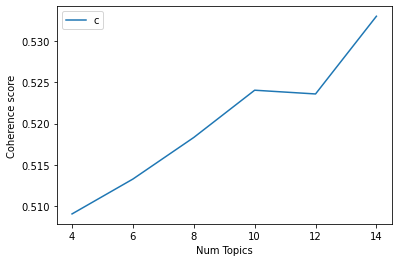

In [58]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, alpha=.91)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


# Running the above function. Can take a long time to run!
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=4, limit=16, step=2)


# Show graph of LDA coherence scores
# ATTEN: parameters here have to match those of you function to display properly!
limit = 16
start = 4
step = 2
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [88]:
max_y = max(coherence_values)  # Find the maximum y value
max_x = coherence_values.index(max(coherence_values))  # Find the x value corresponding to the maximum y value
#xmax = x[numpy.argmax(y)]

#optimal_model = model_list[coherence_values.index(max(coherence_values))]
optimal_model = coherence_values.index(max(coherence_values))
#optimal_model
#model_topics = optimal_model.show_topics(formatted=False)
#pp.pprint(optimal_model.print_topics(num_words=10))

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [89]:
optimal_model = coherence_values.index(max(coherence_values))
optimal_model

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5

In [86]:
import pyLDAvis
import pyLDAvis.gensim

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model, corpus, dictionary=optimal_model.id2word)
vis

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
12     0.186283 -0.117224       1        1  15.554464
10    -0.096469 -0.124217       2        1   9.806184
5      0.075864 -0.089728       3        1   8.213671
13    -0.061277 -0.097302       4        1   7.910551
7     -0.071881 -0.043458       5        1   6.755699
6      0.125889  0.084728       6        1   6.573903
0      0.122379  0.099901       7        1   6.362566
2     -0.017738 -0.007210       8        1   6.233856
1     -0.050786  0.058145       9        1   5.873144
11    -0.072337  0.051527      10        1   5.619120
8     -0.027773  0.025041      11        1   5.520071
4      0.022168  0.037517      12        1   5.509602
3     -0.079108  0.089959      13        1   5.053478
9     -0.055214  0.032322      14        1   5.013700, topic_info=     Category          Freq        Term         Total  loglift  logprob
33    Default  14568.000000        work  14568.000000  30.0000  30.0000
24    Default   4077.000000        life   4077.000000  29.0000  29.0000
21    Default   3327.000000     balance   3327.000000  28.0000  28.0000
23    Default   4991.000000        hour   4991.000000  27.0000  27.0000
120   Default   2600.000000   sometimes   2600.000000  26.0000  26.0000
548   Default   4350.000000         lot   4350.000000  25.0000  25.0000
141   Default   2545.000000    customer   2545.000000  24.0000  24.0000
171   Default   1679.000000      retail   1679.000000  23.0000  23.0000
297   Default   4889.000000        team   4889.000000  22.0000  22.0000
105   Default   1982.000000         con   1982.000000  21.0000  21.0000
12    Default   7508.000000     company   7508.000000  20.0000  20.0000
477   Default   1135.000000       break   1135.000000  19.0000  19.0000
510   Default   1908.000000       shift   1908.000000  18.0000  18.0000
139   Default   1589.000000       apple   1589.000000  17.0000  17.0000
29    Default   7079.000000        time   7079.000000  16.0000  16.0000
326   Default   2928.000000         day   2928.000000  15.0000  15.0000
58    Default   1019.000000    schedule   1019.000000  14.0000  14.0000
64    Default   3443.000000        hard   3443.000000  13.0000  13.0000
941   Default    799.000000        none    799.000000  12.0000  12.0000
9     Default   1054.000000       store   1054.000000  11.0000  11.0000
1228  Default   1187.000000   microsoft   1187.000000  10.0000  10.0000
483   Default    857.000000       large    857.000000   9.0000   9.0000
153   Default   1042.000000           ’   1042.000000   8.0000   8.0000
71    Default   1650.000000      always   1650.000000   7.0000   7.0000
121   Default   3258.000000     working   3258.000000   6.0000   6.0000
116   Default   3118.000000        long   3118.000000   5.0000   5.0000
90    Default   1029.000000      office   1029.000000   4.0000   4.0000
172   Default   1337.000000        feel   1337.000000   3.0000   3.0000
88    Default   6406.000000  management   6406.000000   2.0000   2.0000
267   Default    914.000000        rate    914.000000   1.0000   1.0000
...       ...           ...         ...           ...      ...      ...
355   Topic14    349.334564        need   2543.780518   1.0076  -4.4800
12    Topic14    599.420349     company   7508.343750   0.4652  -3.9401
64    Topic14    365.739838        hard   3443.632812   0.7506  -4.4341
519   Topic14    122.889908   structure    491.383423   1.6071  -5.5248
297   Topic14    379.557037        team   4889.075195   0.4372  -4.3971
1383  Topic14    101.733299       heavy    358.794220   1.7326  -5.7137
101   Topic14    121.052994       learn    542.643372   1.4928  -5.5398
385   Topic14    120.012062        food    532.814819   1.5024  -5.5485
116   Topic14    269.879364        long   3118.006104   0.5460  -4.7381
548   Topic14    311.332764         lot   4350.200195   0.3559  -4.5952
29    Topic14    376.790131        time   7079.906250   0.0597  -4.40

In [66]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    id2word = corpora.Dictionary(texts)
    texts = tokenized
    corpus = [id2word.doc2bow(text) for text in texts]
    ldamallet = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=2, id2word=id2word, iterations=100)
    coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_ldamallet = coherence_model_ldamallet.get_coherence()
    #pp.pprint(ldamallet.show_topics(formatted=False))
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, alpha=.91)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [67]:
compute_coherence_values(id2word, corpus, tokenized, 14, 2, 1)

([<gensim.models.ldamodel.LdaModel at 0x12c748450>,
 [0.4913752141747916,
  0.4867789046535959,
  0.49612565679718335,
  0.5145950264056164,
  0.5105058249404838,
  0.5264648258843527,
  0.5433156059858651,
  0.5133015420430185,
  0.5259098513866982,
  0.5288076930286172,
  0.524245376705223,
  0.5207646729810613])

In [90]:
def make_pyldavis(dictionary, corpus, texts, start, limit, step):
    dictionary = id2word
    model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=4, limit=16, step=2)
    model_list.index(x.index(max(coherence_values))) #change!
    max_y = max(coherence_values)
    max_x = coherence_values.index(max(coherence_values))  #change!
    optimal_model = coherence_values.index(max(coherence_values))#change!
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(optimal_model, corpus, dictionary=optimal_model.id2word)
    return vis

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
max_x

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5

In [92]:
make_pyldavis(dictionary, corpus, texts, 4,16,2)

/Users/theresasporn/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ValueError: sequence.index(x): x not in sequence